##  CS-651-B TEXT BASED ANALYSIS 
##  Vineeth Anumula
##  Assignment 2 

#### Reading the data from dataset(SPAM text message 20170820 - Data.csv)

In [279]:
import pandas as pd
df = pd.read_csv("SPAM text message 20170820 - Data.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### To print columns

In [281]:
df.columns


Index(['Category', 'Message'], dtype='object')

#### To print data types

In [283]:
df.dtypes

Category    object
Message     object
dtype: object

#### df.info() provides a concise summary of a DataFrame, including the column names, their data types, the number of non-null values, and memory usage. 

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### The df.describe() function in pandas provides summary statistics of numeric columns in a DataFrame. It computes various descriptive statistics, including measures of central tendency, dispersion, and shape of the distribution. 


In [287]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


#### Adding a new column length to the DataFrame df containing the length of each message is a useful step. Running df.describe() after adding this column will provide summary statistics for this new column along with existing numeric columns.

In [289]:
df['length'] = df['Message'].str.len()
df.describe()

,length
count,5572.000000
mean,80.368988
std,59.926946
min,2.000000
25%,35.750000
50%,61.000000
75%,122.000000
max,910.000000


#### df.describe(include='O') will provide summary statistics for columns containing object data types (usually strings) in your DataFrame df.

In [291]:
df.describe(include='O')

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


#### df.isna().sum() will give the count of missing values (NaN) in each column of your DataFrame df. This allows us to quickly see how many missing values exist in each column. 

In [293]:
df.isna().sum()

Category    0
Message     0
length      0
dtype: int64

#### The str.upper() method, make the text in these columns consistently uppercase across the entire DataFrame.

In [295]:
df['Category']= df['Category'].str.upper()
df['Message'] = df['Message'].str.upper()
df

,Category,Message,length
0,HAM,"GO UNTIL JURONG POINT, CRAZY.. AVAILABLE ONLY ...",111
1,HAM,OK LAR... JOKING WIF U ONI...,29
2,SPAM,FREE ENTRY IN 2 A WKLY COMP TO WIN FA CUP FINA...,155
3,HAM,U DUN SAY SO EARLY HOR... U C ALREADY THEN SAY...,49
4,HAM,"NAH I DON'T THINK HE GOES TO USF, HE LIVES ARO...",61
...,...,...,...
5567,SPAM,THIS IS THE 2ND TIME WE HAVE TRIED 2 CONTACT U...,160
5568,HAM,WILL Ü B GOING TO ESPLANADE FR HOME?,36
5569,HAM,"PITY, * WAS IN MOOD FOR THAT. SO...ANY OTHER S...",57
5570,HAM,THE GUY DID SOME BITCHING BUT I ACTED LIKE I'D...,125


In [296]:
df[df['Category'].str.contains('SPAM')]


,Category,Message,length
2,SPAM,FREE ENTRY IN 2 A WKLY COMP TO WIN FA CUP FINA...,155
5,SPAM,FREEMSG HEY THERE DARLING IT'S BEEN 3 WEEK'S N...,147
8,SPAM,WINNER!! AS A VALUED NETWORK CUSTOMER YOU HAVE...,157
9,SPAM,HAD YOUR MOBILE 11 MONTHS OR MORE? U R ENTITLE...,154
11,SPAM,"SIX CHANCES TO WIN CASH! FROM 100 TO 20,000 PO...",136
...,...,...,...
5537,SPAM,WANT EXPLICIT SEX IN 30 SECS? RING 02073162414...,90
5540,SPAM,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158
5547,SPAM,HAD YOUR CONTRACT MOBILE 11 MNTHS? LATEST MOTO...,160
5566,SPAM,REMINDER FROM O2: TO GET 2.50 POUNDS FREE CALL...,147


#### Line plot of the length of each message in the DataFrame.

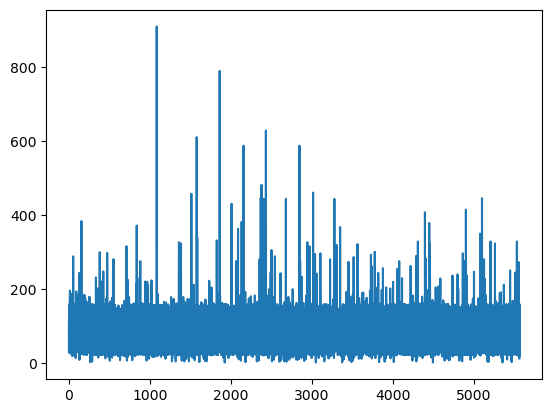

In [298]:
import pandas as pd
import matplotlib.pyplot as plt
# For the line plot
df['length'].plot()
plt.show() 

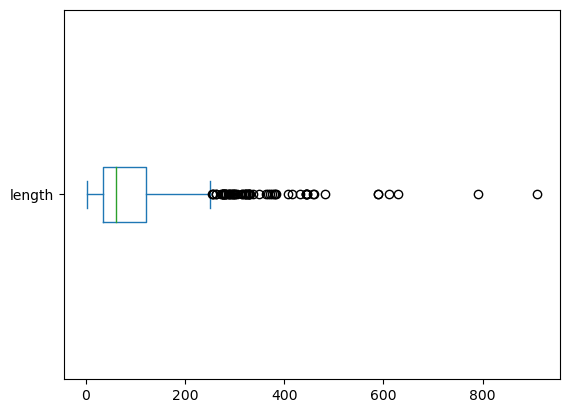

In [299]:
# For the horizontal box plot
df['length'].plot(kind='box', vert=False)
plt.show() 

#### Histogram of the 'length' column

<Axes: ylabel='Frequency'>

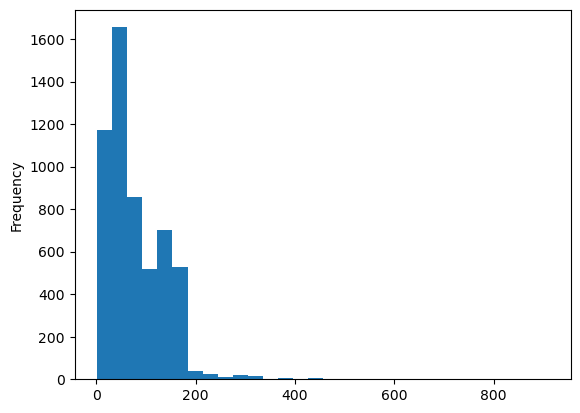

In [301]:
df['length'].plot(kind='hist', bins=30)


#### Box plot of message lengths for each category ('SPAM' and 'HAM')

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


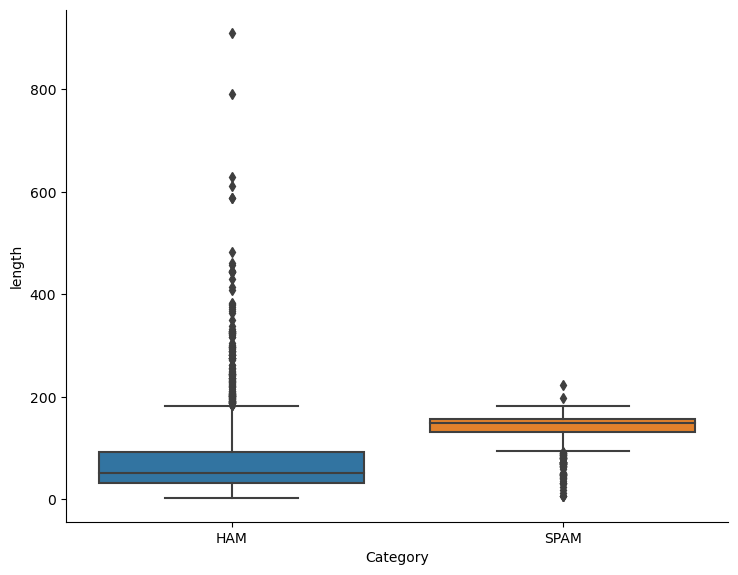

In [303]:
import seaborn as sns 
where = df['Category'].isin(['SPAM','HAM'])
g = sns.catplot(data=df[where], x="Category", y="length", kind='box')
g.fig.set_size_inches(8, 6)

#### 'tokenize' function 
aims to split a given text into tokens, considering words and hyphenated words that contain at least one alphabet character.

In [305]:
import regex as re
def tokenize(column):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [306]:
import regex as re

def tokenize(text):
    # This regular expression matches words and hyphenated words that contain at least one alphabet character
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Example usage
text = "Message"
tokens = tokenize(text)
print(tokens)



['Message']


In [307]:
testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov"
testtokens = tokenize(testtext)
 
print(testtokens)

['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in', 'www', 'cdc', 'gov']


#### Text preprocessing tasks

In [309]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)


{'to', 'have', 'been', 'for', 'from', 'with', 'how', 'd', 's', 'am', 'if', 'yours', 'most', "didn't", 'no', "she's", 'there', 'too', 'an', 'here', 'some', "wouldn't", 'herself', 'hasn', "aren't", "don't", "shan't", 'aren', 'myself', 'are', 'having', "you've", 'further', 'then', 'themselves', "mustn't", 'does', 'theirs', 'they', 'out', 'so', 'in', 'needn', 'her', 'what', 'we', "you'll", 'their', "weren't", 'i', 'who', 'into', 'shouldn', "couldn't", 'your', 'down', "doesn't", 'weren', 're', 'both', "that'll", 'don', 'yourselves', 'couldn', 'than', 'my', "shouldn't", 'you', 'own', 'wouldn', "mightn't", 'where', 'can', 'y', 'isn', 'didn', 'his', "needn't", 'its', 'as', 'any', 'off', 'he', 'all', 'few', 'being', 'these', 'mustn', 'same', 'mightn', 'ain', 'through', 'hadn', 'ours', 'which', 'me', 'just', 'very', 'this', 'on', 'until', 'our', 'haven', 'himself', 'whom', "should've", 've', 'during', 'that', 'such', 'were', 'of', 'but', 'and', 'more', "hadn't", "isn't", 'won', "you're", 'wasn',

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/b37e750d-630d-4bcf-a122-
[nltk_data]     bb3a4a582eb9/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 'remove_stop' function
removes stopwords from a list of tokens while ignoring the case (i.e., considering both lowercase and uppercase versions of stopwords)

In [311]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
#Just testing it
cleantokens= remove_stop(testtokens)
print(cleantokens)


['Let', 'defeat', 'SARS-CoV-2', 'together', 'www', 'cdc', 'gov']


#### 'prepare' function 
defines a text preprocessing pipeline that converts the text to lowercase, tokenizes it, and then removes stopwords. 

In [313]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [314]:
df['tokens'] = df['Message'].apply(prepare, pipeline=pipeline)


In [315]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,Category,Message,length,tokens,num_tokens
5567,SPAM,THIS IS THE 2ND TIME WE HAVE TRIED 2 CONTACT U...,160,"[2nd, time, tried, contact, u, u, pound, prize...",16
5568,HAM,WILL Ü B GOING TO ESPLANADE FR HOME?,36,"[b, going, esplanade, fr, home]",5
5569,HAM,"PITY, * WAS IN MOOD FOR THAT. SO...ANY OTHER S...",57,"[pity, mood, suggestions]",3
5570,HAM,THE GUY DID SOME BITCHING BUT I ACTED LIKE I'D...,125,"[guy, bitching, acted, like, interested, buyin...",13
5571,HAM,ROFL. ITS TRUE TO ITS NAME,26,"[rofl, true, name]",3


#### Using the Counter class from the collections module to count the occurrences of each token in the given text after tokenization.

In [317]:
from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa.")

testcount= Counter(tokens)
print(testcount)


Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


#### To update the counts of tokens from another piece of text using the update method of the Counter object.

In [319]:
more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens)
print(testcount)


Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


#### To print the five most common tokens along with their counts. 

In [321]:
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))


[('u', 1188), ('call', 581), ('ur', 391), ('get', 389), ('gt', 318)]


#### Filtering out tokens with a frequency of less than 1, setting the index name, and sorting the DataFrame based on the frequency in descending order. 

In [323]:
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'


In [324]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)


,freq
token,
u,1188
call,581
ur,391
get,389
gt,318
lt,316
ok,293
go,283
free,279


#### 'freq_df.describe()' provides summary statistics for the DataFrame

In [326]:
freq_df.describe()


,freq
count,8145.000000
mean,6.139472
std,23.633721
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,1188.000000


#### Horizontal bar plot (barh) of the top 15 most frequent tokens from the DataFrame freq_df

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

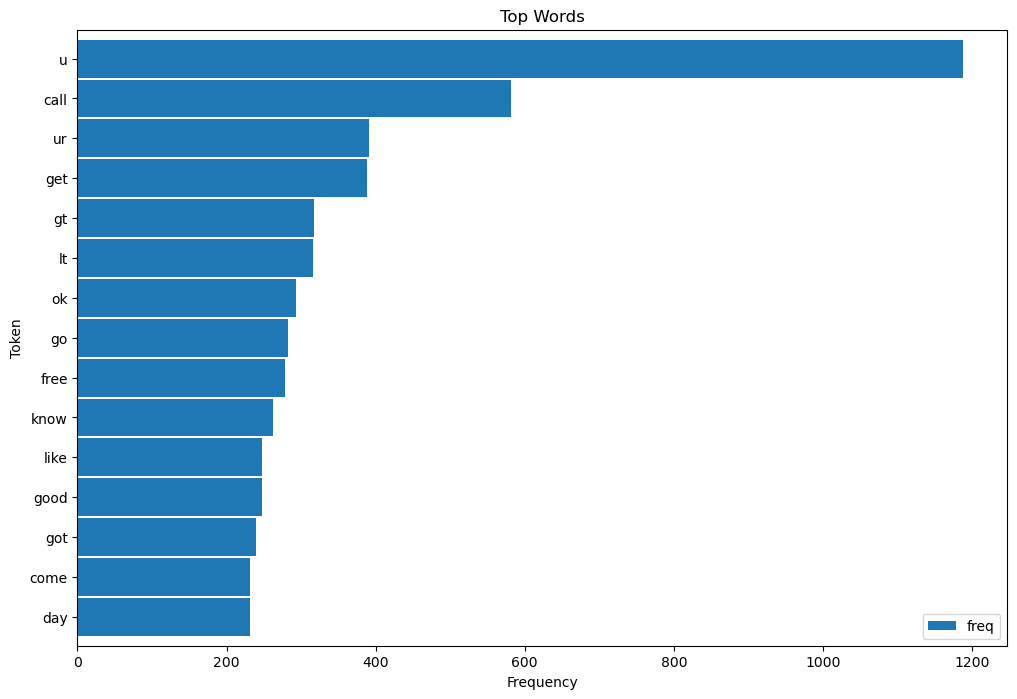

In [328]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')


#### To generate a word cloud from the messages in the DataFrame df, filtering them by category ('SPAM' or 'HAM').

(-0.5, 399.5, 199.5, -0.5)

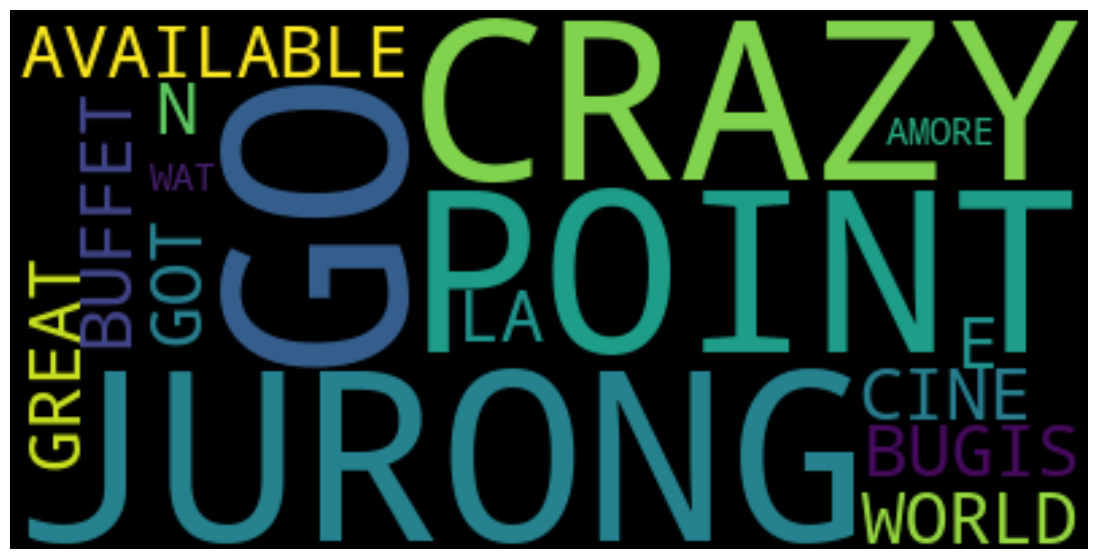

In [330]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = df.query("Category=='SPAM' or Category=='HAM'")['Message'].values[0]

plt.figure(figsize=(14, 7))
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

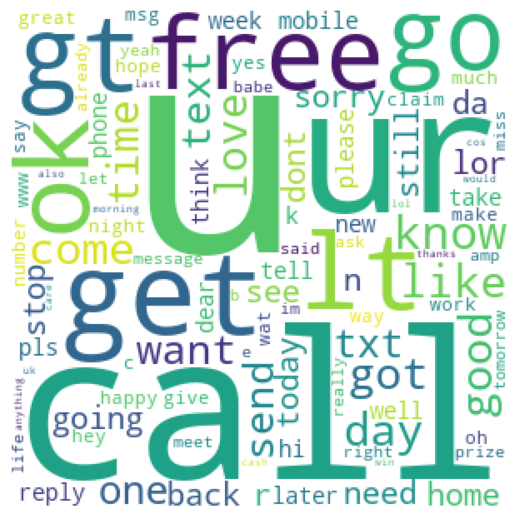

In [331]:
wc = WordCloud(background_color='white', width = 300, height=300, max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (5, 7), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
